<a href="https://colab.research.google.com/github/shayan-saif/housing-prediction/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Project
Reese Daniel & Shayan Saif | November 2020 | INFR 3700 | University of Ontario Institute of Technology



## Data Graphs & Insights

In [ ]:
#import all the things that we need here
!pip install -q geopandas
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
#import the csv from S3, header=0 means the first row contains col names, index_col=False means pandas should come up with its own row IDs, usecols only includes the desired columns 
data = pd.read_csv('https://ml-final-project.s3.amazonaws.com/housing_exported.csv',header=0, index_col=False,
                   usecols=['price','type','sqfeet','beds','baths','cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','latitude','longitude','state'])
#Show the first 5 rows to get a feel for what the dataframe looks like
data.head()

     |████████████████████████████████| 972kB 3.4MB/s 
     |████████████████████████████████| 14.8MB 203kB/s 
     |████████████████████████████████| 6.5MB 53.2MB/s 


,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,latitude,longitude,state
0,799,apartment,954,2,2.0,1,1,1,0,0,0,30.4195,-84.2349,fl
1,1005,apartment,1117,2,2.0,1,1,1,0,0,0,34.6924,-86.7225,al
2,750,apartment,763,2,2.0,1,1,1,0,0,0,31.5395,-110.2990,az
3,1000,apartment,800,1,0.0,0,1,1,0,0,0,61.2234,-149.7820,ak
4,530,apartment,641,1,1.0,1,1,1,0,0,0,32.4352,-85.0018,al


In [ ]:
#Drop all rows that have 1 or more missing values
print("Dropping",len(data)-len(data.dropna()),"rows because they contain missing values")
data.dropna(inplace=True)

Dropping 1920 rows because they contain missing values


In [ ]:
#Look at the distribution of number of beds
data.beds.groupby(data.beds).describe().sort_values(by='count')

,count,mean,std,min,25%,50%,75%,max
beds,,,,,,,,
1000,2.0,1000.0,0.0,1000.0,1000.0,1000.0,1000.0,1000.0
1100,2.0,1100.0,0.0,1100.0,1100.0,1100.0,1100.0,1100.0
8,31.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0
7,49.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0
6,238.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
5,2313.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
0,10922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11454.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
3,66519.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
# There are 4 outliers with >= 1000 beds; let's remove them
data = data[data.beds <= 8]

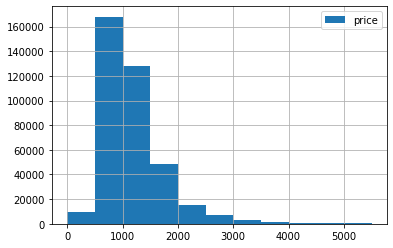

In [ ]:
#Histogram of prices
data.price.hist(bins=np.arange(start=0,stop=6000,step=500), legend=True, figsize=(6,4))

In [ ]:
#Seems like most housing units cost less than $4000
#Let's remove all rows where the price is > $10,000
print("Removing",len(data[data.price > 10000]),"rows because their price is an outlier")
data = data[data.price <= 10000]

Removing 267 rows because their price is an outlier


In [ ]:
#Remove any rows with a price of $0; this is probably just what the lister does when they don't want to share the price online
print("Removing",len(data[data.price == 0]),"rows because the price is $0 and that's gotta be untrue")
data = data[data.price > 0]

Removing 1299 rows because the price is $0 and that's gotta be untrue


type
apartment          AxesSubplot(0.125,0.125;0.775x0.755)
assisted living    AxesSubplot(0.125,0.125;0.775x0.755)
condo              AxesSubplot(0.125,0.125;0.775x0.755)
cottage/cabin      AxesSubplot(0.125,0.125;0.775x0.755)
duplex             AxesSubplot(0.125,0.125;0.775x0.755)
flat               AxesSubplot(0.125,0.125;0.775x0.755)
house              AxesSubplot(0.125,0.125;0.775x0.755)
in-law             AxesSubplot(0.125,0.125;0.775x0.755)
land               AxesSubplot(0.125,0.125;0.775x0.755)
loft               AxesSubplot(0.125,0.125;0.775x0.755)
manufactured       AxesSubplot(0.125,0.125;0.775x0.755)
townhouse          AxesSubplot(0.125,0.125;0.775x0.755)
Name: type, dtype: object

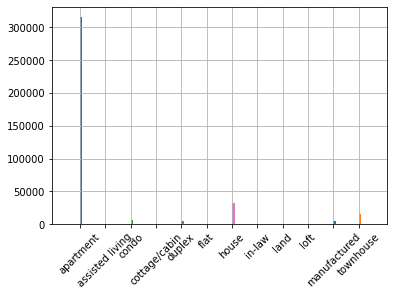

In [ ]:
#Histogram of type column
data.type.groupby(data.type).hist(figsize=(6,4), xrot=45)

In [ ]:
#Seems like the hefty majority of housing units are apartments; to simplify our models, let's just only keep apartments and drop the column
print("Removing",len(data[data.type != 'apartment']),"rows because they aren't apartments")
data = data[data.type == 'apartment']
data.drop(columns=['type'], inplace=True)
print("The data frame now has",len(data),"rows")

Removing 65927 rows because they aren't apartments
The data frame now has 315559 rows


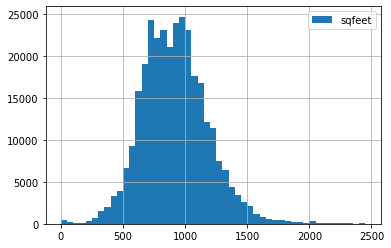

In [ ]:
#Histogram of sqfeet
data.sqfeet.hist(bins=np.arange(start=0,stop=2500,step=50), legend=True, figsize=(6,4))

In [ ]:
#Let's remove any rows where the sqfeet is less than 100 since this probably isn't true
print("Removing",len(data[data.sqfeet < 100]),"rows since they are listed as under 100 sq ft")
data = data[data.sqfeet >= 100]

Removing 665 rows since they are listed as under 100 sq ft


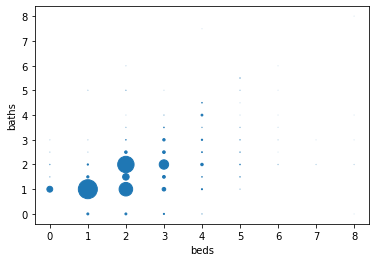

In [ ]:
#Plot a scatter with x-axis being number of beds and y-axis being number of baths
bedbath = data.groupby(['beds','baths']).size().reset_index(name='freq')
bedbath.plot.scatter(x='beds',y='baths',s=bedbath.freq/300)

longitude                 -0.158831
smoking_allowed           -0.133275
comes_furnished           -0.005537
sqfeet                     0.003155
dogs_allowed               0.006927
cats_allowed               0.010311
latitude                   0.049311
wheelchair_access          0.102725
beds                       0.165958
electric_vehicle_charge    0.166638
baths                      0.229534
price                      1.000000
Name: price, dtype: float64

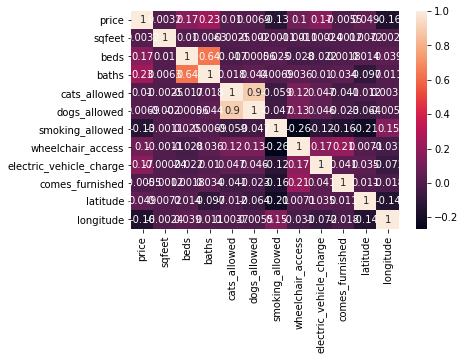

In [ ]:
#Correlation matrix and heatmap
sn.heatmap(data.corr(), annot=True)
data.corr()['price'].sort_values()

In [ ]:
#Remove any rows where longitude falls outside of [-180,180]
#Remove any rows where latitude falls outside of [-90,90]
data = data[data.longitude <= 180]
data = data[data.longitude >= -180]
data = data[data.latitude <= 90]
data = data[data.latitude >= -90]

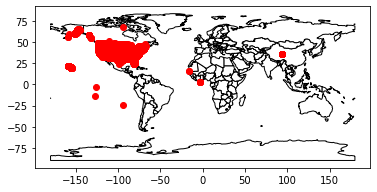

In [ ]:
#Plot on a world map to find outliers
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

In [ ]:
#A number of rows have incorrect latitudes and longitudes
#Let's restrict our data to the continental US for simplicity
data = data[data.longitude <= -64]
data = data[data.longitude >= -144]
data = data[data.latitude <= 49]
data = data[data.latitude >= 24]

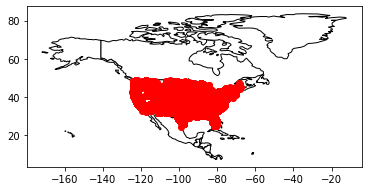

In [ ]:
#Plot on a map of North America
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

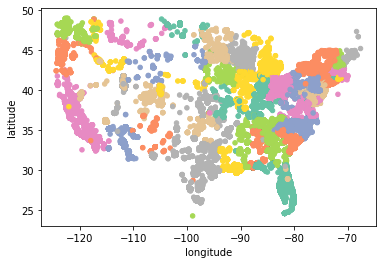

In [ ]:
#Scatter plot, longitude vs. latitude, colored by state
color_labels = data['state'].unique()
rgb_values = sn.color_palette("Set2",50)
color_map = dict(zip(color_labels, rgb_values))
data.plot.scatter(x='longitude',y='latitude', c=data['state'].map(color_map))

## Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
#Split data into 80% training and 20% testing data
train, test = train_test_split(data, test_size=0.2, random_state=69)
#train_target is only the price column, since that's what we're trying to predict
train_target = train['price']
#Same thing with test_target
test_target = test['price']
#train_features and test_features will hold all the columns we will use to train and test the models.
#Price is removed because that's what we're predicting.  State is removed becase it's a class and we aren't doing one hot encoding.  Geometry is removed because it's an abstract object type.
train_features = train.drop(columns=['price','state','geometry'])
test_features = test.drop(columns=['price','state','geometry'])

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,latitude,longitude,state,geometry
37266,655,792,1,1.0,0,0,1,0,0,0,39.0119,-95.7151,ks,POINT (-95.71510 39.01190)
63285,1350,1132,2,2.0,1,0,1,1,0,0,43.1807,-87.9173,wi,POINT (-87.91730 43.18070)
112797,1800,602,1,1.0,1,0,0,0,0,0,42.2729,-71.7995,ma,POINT (-71.79950 42.27290)
20564,1399,1345,2,2.5,1,1,0,0,0,0,29.6132,-82.3873,fl,POINT (-82.38730 29.61320)
120761,499,680,1,1.0,1,1,1,0,0,0,36.1459,-95.8514,ok,POINT (-95.85140 36.14590)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382642,1525,836,2,1.0,0,0,1,0,0,0,47.3467,-122.2220,wa,POINT (-122.22200 47.34670)
260771,1010,825,2,1.0,1,0,1,0,0,0,43.0934,-89.3636,wi,POINT (-89.36360 43.09340)
369830,764,864,2,1.0,0,0,1,0,0,0,38.0129,-84.4541,ky,POINT (-84.45410 38.01290)
32379,799,1050,2,1.5,1,1,1,0,0,0,35.5866,-77.3485,nc,POINT (-77.34850 35.58660)


## Machine Learning Algorithms

In [ ]:
#All our machine learning algorithms have the same goal: use train_features (all our interesting columns) to predict train_target (price)
#We can gauage the performance of these models using the test_features to predict test_target, and analyzing the Mean Square Error or Mean Absolute Error

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train_features, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([ 5.34585193e-05,  3.26398750e+01,  1.98514427e+02,  4.31958229e+01,
       -6.05993783e+01, -9.72847389e+01,  1.12316036e+02,  6.61183564e+02,
       -1.32465936e+02,  4.67207958e+00, -4.91946151e+00])

In [ ]:
reg.intercept_

258.85437297979774

In [ ]:
data.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,latitude,longitude
count,312370.000000,3.123700e+05,312370.000000,312370.000000,312370.000000,312370.000000,312370.000000,312370.000000,312370.000000,312370.000000,312370.00000,312370.000000
mean,1151.663101,9.609601e+02,1.728149,1.415712,0.764097,0.736594,0.755630,0.087547,0.012447,0.039488,37.05051,-92.252894
std,536.809731,1.539256e+04,0.769009,0.547422,0.424563,0.440481,0.429714,0.282635,0.110869,0.194754,5.10615,14.613579
min,1.000000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.22880,-124.423000
25%,804.000000,7.260000e+02,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33.38130,-98.580100
50%,1025.000000,9.000000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.25665,-87.695800
75%,1355.000000,1.079000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.77390,-81.179600
max,10000.000000,8.388607e+06,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.99270,-67.592900


In [ ]:
from sklearn.metrics import mean_squared_error as MSE

reg_pred = reg.predict(test_features)
reg_rmse = MSE(test_target, reg_pred) ** (1/2)

print("The root mean squared error:\t", reg_rmse)

The root mean squared error:	 511.6780334158896


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.1,
                           random_state=3)

In [ ]:
dt.fit(train_features, train_target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [ ]:
dt_pred = dt.predict(test_features)
dt_rmse = MSE(test_target, dt_pred) ** (1/2)

print("The root mean squared error:\t", dt_rmse)

The root mean squared error:	 464.7385435970871


Text(0.5, 1.0, 'Price Prediction by Square Feet')

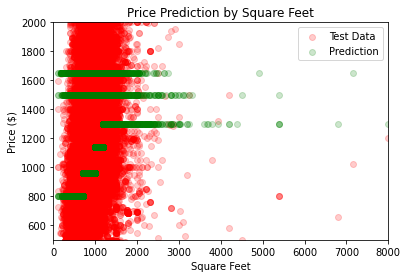

In [ ]:
axes = plt.gca()
axes.set_xlim([0,8000])
axes.set_ylim([500, 2000])

plt.scatter(test_features['sqfeet'], test_target, alpha=0.2, c='red', label="Test Data")
plt.scatter(test_features['sqfeet'], dt_pred, alpha=0.2, c='green', label="Prediction")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Price Prediction by Square Feet")

Text(0.5, 1.0, 'Price Prediction by Latitude')

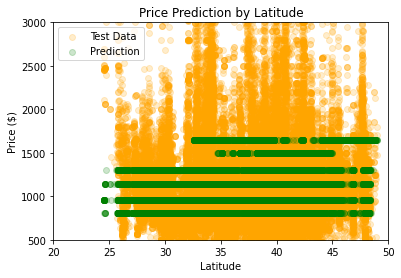

In [ ]:
axes = plt.gca()
axes.set_xlim([20,50])
axes.set_ylim([500, 3000])

plt.scatter(test_features['latitude'], test_target, alpha=0.2, c='orange', label="Test Data")
plt.scatter(test_features['latitude'], dt_pred, alpha=0.2, c='green', label="Prediction")
plt.xlabel("Latitude")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Price Prediction by Latitude")

Text(0.5, 1.0, 'Price Prediction by Number of Baths')

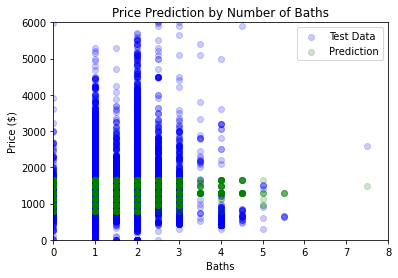

In [ ]:
axes = plt.gca()
axes.set_xlim([0,8])
axes.set_ylim([0, 6000])

plt.scatter(test_features['baths'], test_target, alpha=0.2, c='blue', label="Test Data")
plt.scatter(test_features['baths'], dt_pred, alpha=0.2, c='green', label="Prediction")
plt.xlabel("Baths")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Price Prediction by Number of Baths")

Text(0.5, 1.0, 'Price Prediction by Number of Beds')

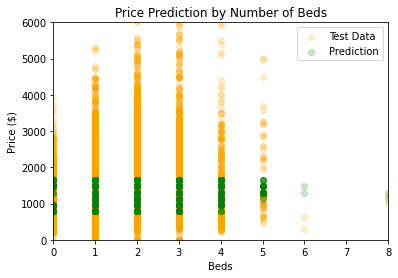

In [ ]:
axes = plt.gca()
axes.set_xlim([0,8])
axes.set_ylim([0, 6000])

plt.scatter(test_features['beds'], test_target, alpha=0.2, c='orange', label="Test Data")
plt.scatter(test_features['beds'], dt_pred, alpha=0.2, c='green', label="Prediction")
plt.xlabel("Beds")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Price Prediction by Number of Beds")

Deep Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scale = scaler.fit_transform(train_features)
test_scale = scaler.transform(test_features)

from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [ ]:
import tensorflow as tf
from tensorflow import keras

dnn = keras.models.Sequential([
normalizer,
keras.layers.Dense(11, input_dim=11, activation="relu", kernel_initializer='normal'),
keras.layers.Dense(5, activation="relu", kernel_initializer='normal'),
keras.layers.Dense(5, activation="relu", kernel_initializer='normal'),
keras.layers.Dense(5, activation="relu", kernel_initializer='normal'),
keras.layers.Dense(1, kernel_initializer='normal')
])



In [ ]:
dnn.compile(loss="mean_squared_error",
optimizer='adam')

In [ ]:
history = dnn.fit(train_scale, train_target, epochs=10, validation_data=(test_scale, test_target), verbose=1)

Epoch 1/10
7810/7810 [==============================] - 17s 2ms/step - loss: 309688.8750 - val_loss: 268661.1250
Epoch 2/10
7810/7810 [==============================] - 17s 2ms/step - loss: 257300.3125 - val_loss: 267195.5938
Epoch 3/10
7810/7810 [==============================] - 17s 2ms/step - loss: 256910.2656 - val_loss: 267786.4062
Epoch 4/10
7810/7810 [==============================] - 17s 2ms/step - loss: 256671.4688 - val_loss: 267003.0312
Epoch 5/10
7810/7810 [==============================] - 17s 2ms/step - loss: 256607.1094 - val_loss: 266878.1875
Epoch 6/10
7810/7810 [==============================] - 17s 2ms/step - loss: 256387.6875 - val_loss: 266584.2188
Epoch 7/10
7810/7810 [==============================] - 18s 2ms/step - loss: 256354.8125 - val_loss: 268129.4375
Epoch 8/10
7810/7810 [==============================] - 17s 2ms/step - loss: 256243.3438 - val_loss: 267185.9375
Epoch 9/10
7810/7810 [==============================] - 17s 2ms/step - loss: 256189.4375 - val_l